In [71]:
# Addlibrary
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
import seaborn as sns


In [72]:
# Get input data
df_churnBigml20= pd.read_csv("churn-bigml-20.csv",delimiter=",");
df_churnBigml80= pd.read_csv("churn-bigml-80.csv",delimiter=",");

In [73]:
# Merge the two data into a new table
df_new_churn = pd.concat([df_churnBigml20, df_churnBigml80], ignore_index=True);

In [74]:
# See general information
df_new_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [75]:
# View data information
df_new_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [76]:
# See data description
df_new_churn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [77]:
# Preprocess data
# 1. Check for missing data
print("Check for missing data")
df_new_churn.isnull().sum()

Check for missing data


State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [78]:
#2. Check for duplicate field data
duplicate_rows= df_new_churn[df_new_churn.duplicated()];
print(f"Check for duplicate data: {duplicate_rows.shape[0]}")

Check for duplicate data: 0


In [79]:
#3. Encode categorical columns
df_new_churn['International plan'] = df_new_churn['International plan'].map({'Yes': 1, 'No': 0})
df_new_churn['Voice mail plan'] = df_new_churn['Voice mail plan'].map({'Yes': 1, 'No': 0})
df_new_churn['Churn'] = df_new_churn['Churn'].map({False: 0, True: 1})
df_new_churn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [80]:
# Divide the data into training set and test set
X = df_new_churn.drop('Churn', axis=1)
y = df_new_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

Training set: (2666, 19)
Test set: (667, 19)


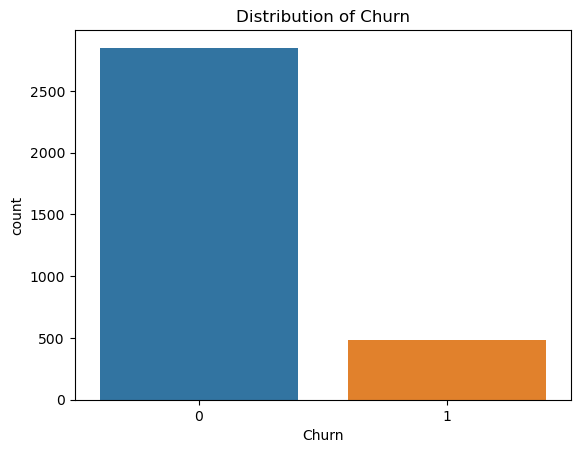

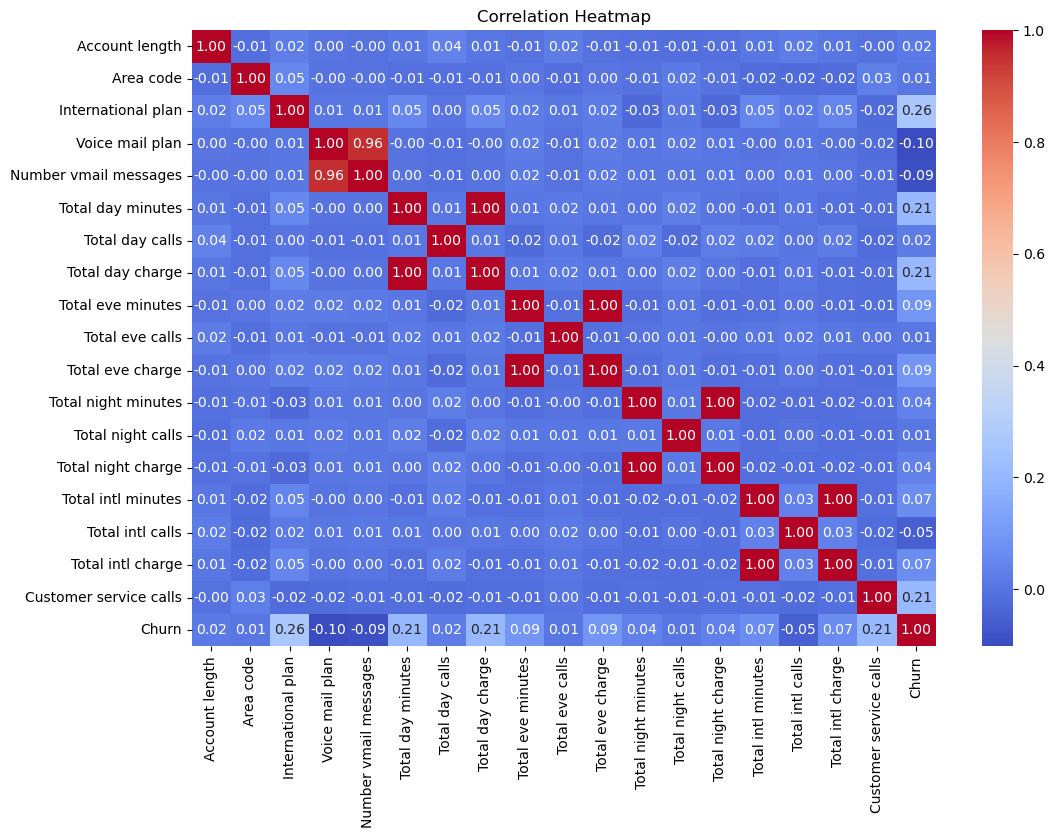

In [81]:
# Data Analyst
#  EDA
sns.countplot(x='Churn', data=df_new_churn)
plt.title('Distribution of Churn')
plt.show()
# Tương quan giữa các biến số và biến mục tiêu 'Churn'
plt.figure(figsize=(12, 8))
sns.heatmap(df_new_churn.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [82]:

# Perform one-hot encoding for columns containing string data
X_encoded = pd.get_dummies(X, columns=['State', 'International plan', 'Voice mail plan'])
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X_encoded, y)
selected_features = X_encoded.columns[selector.get_support(indices=True)]
print("Selected features:", selected_features)

Selected features: Index(['Number vmail messages', 'Total day minutes', 'Total day charge',
       'Total eve minutes', 'Total eve charge', 'Customer service calls',
       'International plan_0', 'International plan_1', 'Voice mail plan_0',
       'Voice mail plan_1'],
      dtype='object')


In [83]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [84]:
# Evaluate the model
y_pred = model.predict(X_test[selected_features])
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9205397301349325
Precision: 0.8028169014084507
Recall: 0.59375
F1 Score: 0.6826347305389222

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       571
           1       0.80      0.59      0.68        96

    accuracy                           0.92       667
   macro avg       0.87      0.78      0.82       667
weighted avg       0.92      0.92      0.92       667



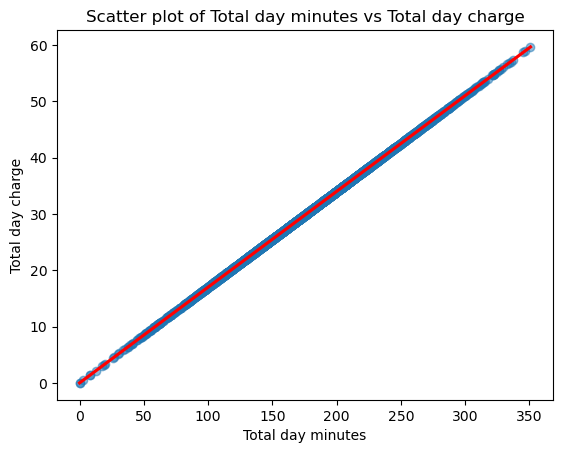

In [85]:
# Scatter chart
plt.scatter(df_new_churn['Total day minutes'], df_new_churn['Total day charge'], alpha=0.5)

# Add a linear regression line
sns.regplot(x='Total day minutes', y='Total day charge', data=df_new_churn, scatter=False, color='red')

plt.title('Scatter plot of Total day minutes vs Total day charge')
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.show()

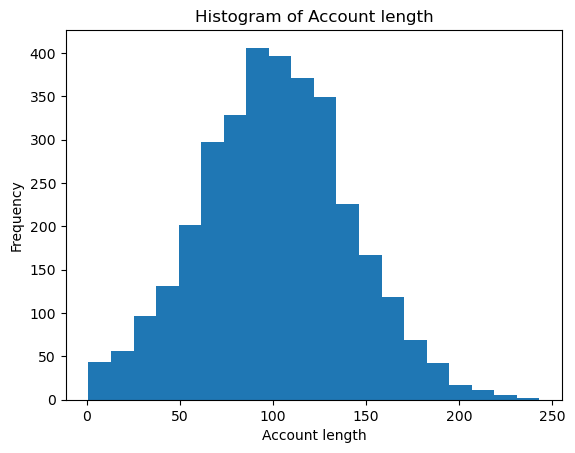

In [86]:
# Histogram chart for the 'Account length' column
plt.hist(df_new_churn['Account length'], bins=20)
plt.title('Histogram of Account length')
plt.xlabel('Account length')
plt.ylabel('Frequency')
plt.show()

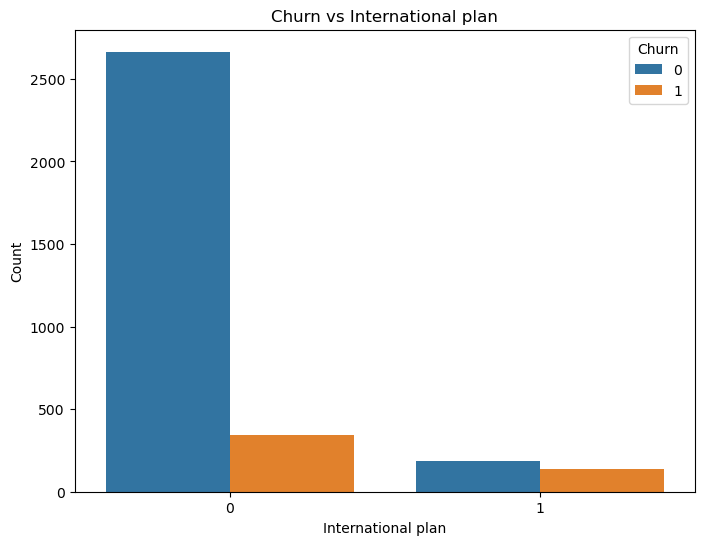

In [87]:
plt.figure(figsize=(8, 6))
sns.countplot(x='International plan', hue='Churn', data=df_new_churn)
plt.title('Churn vs International plan')
plt.xlabel('International plan')
plt.ylabel('Count')
plt.show()

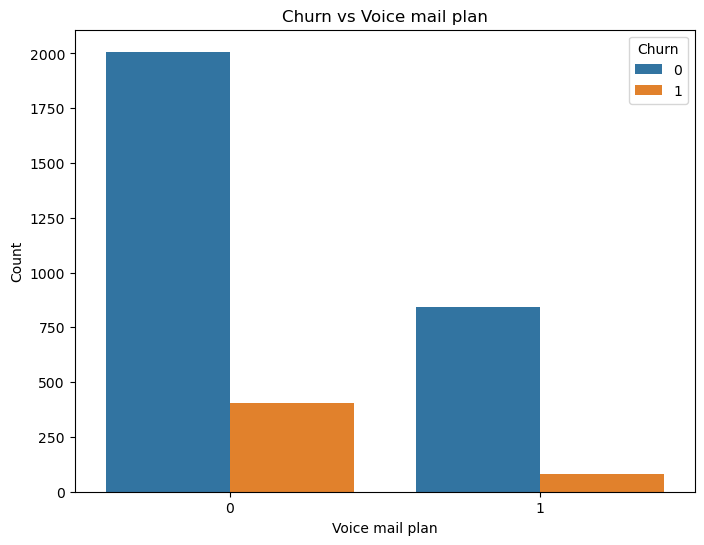

In [88]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Voice mail plan', hue='Churn', data=df_new_churn)
plt.title('Churn vs Voice mail plan')
plt.xlabel('Voice mail plan')
plt.ylabel('Count')
plt.show()


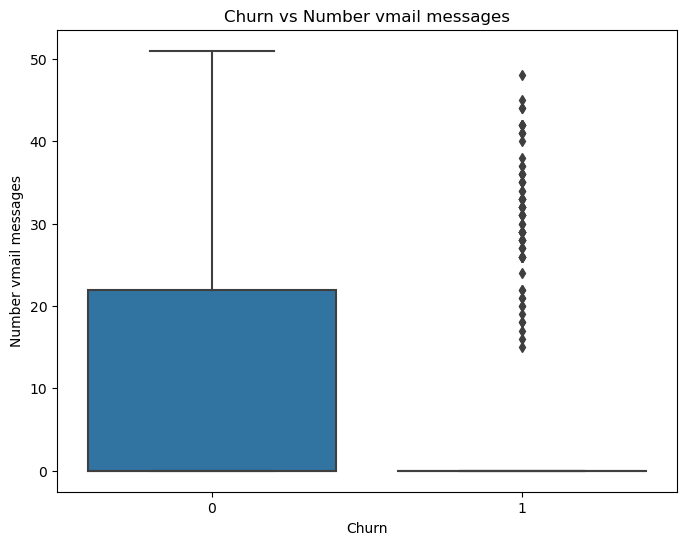

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Number vmail messages', data=df_new_churn)
plt.title('Churn vs Number vmail messages')
plt.xlabel('Churn')
plt.ylabel('Number vmail messages')
plt.show()

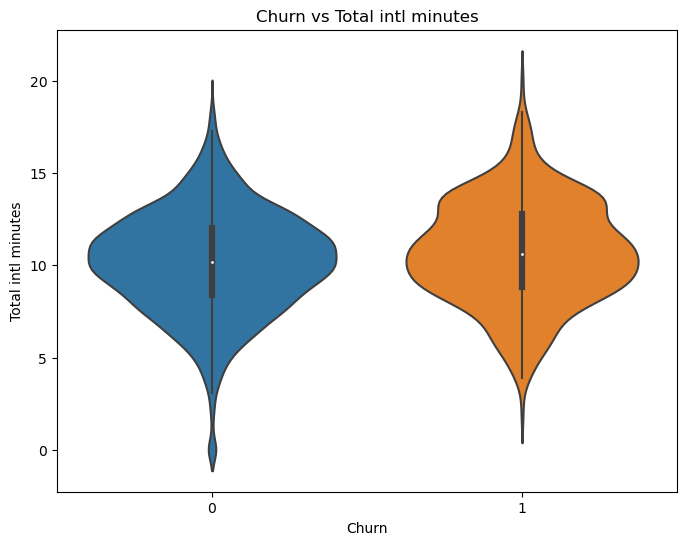

In [90]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Total intl minutes', data=df_new_churn)
plt.title('Churn vs Total intl minutes')
plt.xlabel('Churn')
plt.ylabel('Total intl minutes')
plt.show()

C:\Users\Nam\AppData\Local\Temp\ipykernel_10432\656210961.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_revenue['Total revenue'] = df_revenue[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)


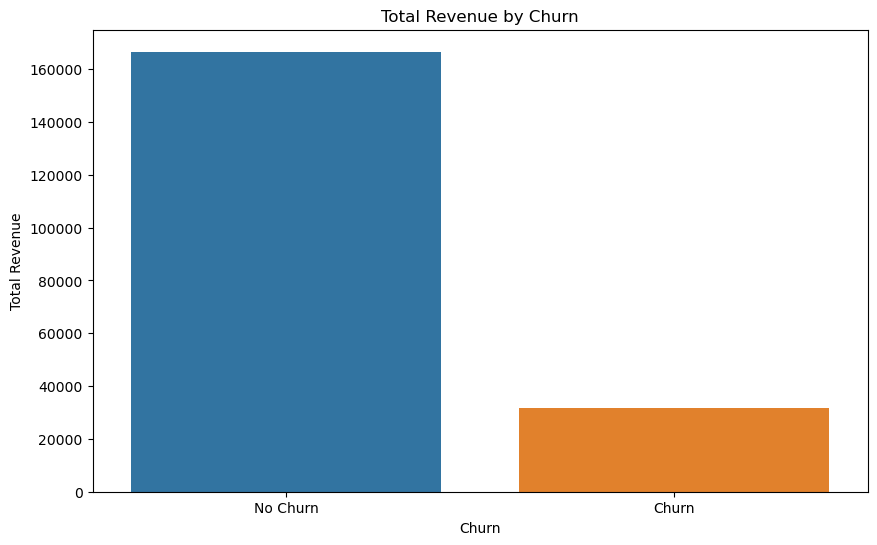

In [91]:
# Create a DataFrame containing only the necessary columns
df_revenue = df_new_churn[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Churn']]

# Calculate total revenue from services for both churn and non-churn groups
df_revenue['Total revenue'] = df_revenue[['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']].sum(axis=1)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
sns.barplot(x='Churn', y='Total revenue', data=df_revenue, estimator=sum, ci=None)
plt.title('Total Revenue by Churn')
plt.xlabel('Churn')
plt.ylabel('Total Revenue')
plt.xticks([0, 1], ['No Churn', 'Churn'])
plt.show()

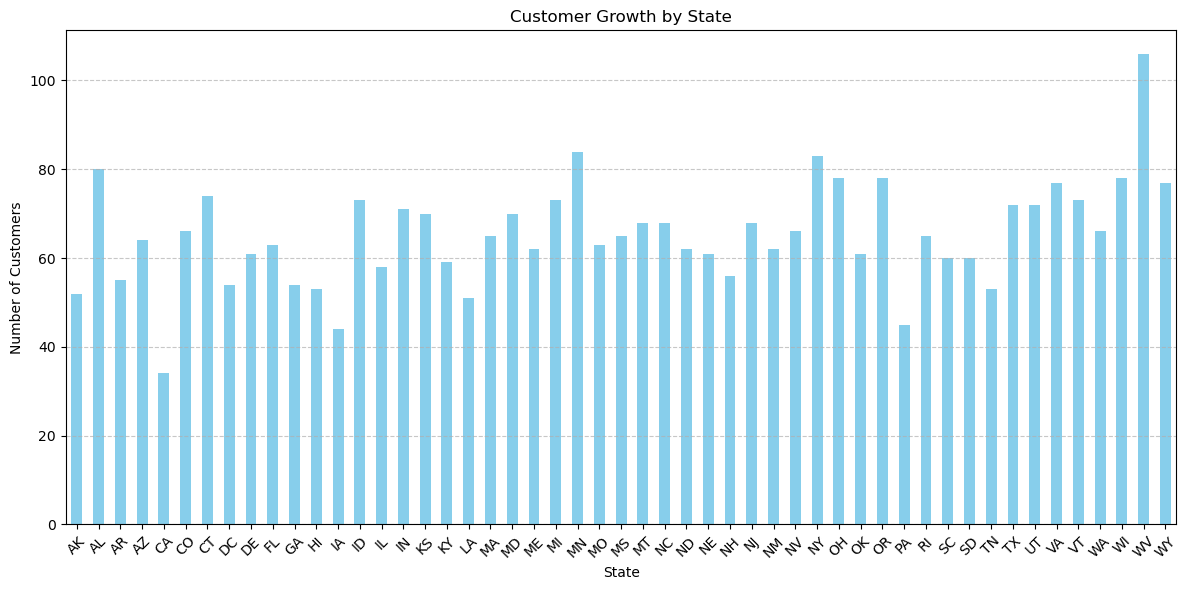

In [92]:

# Calculate the total number of customers in each state
customer_count_by_state = df_new_churn.groupby('State')['Account length'].count()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
customer_count_by_state.plot(kind='bar', color='skyblue')
plt.title('Customer Growth by State')
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


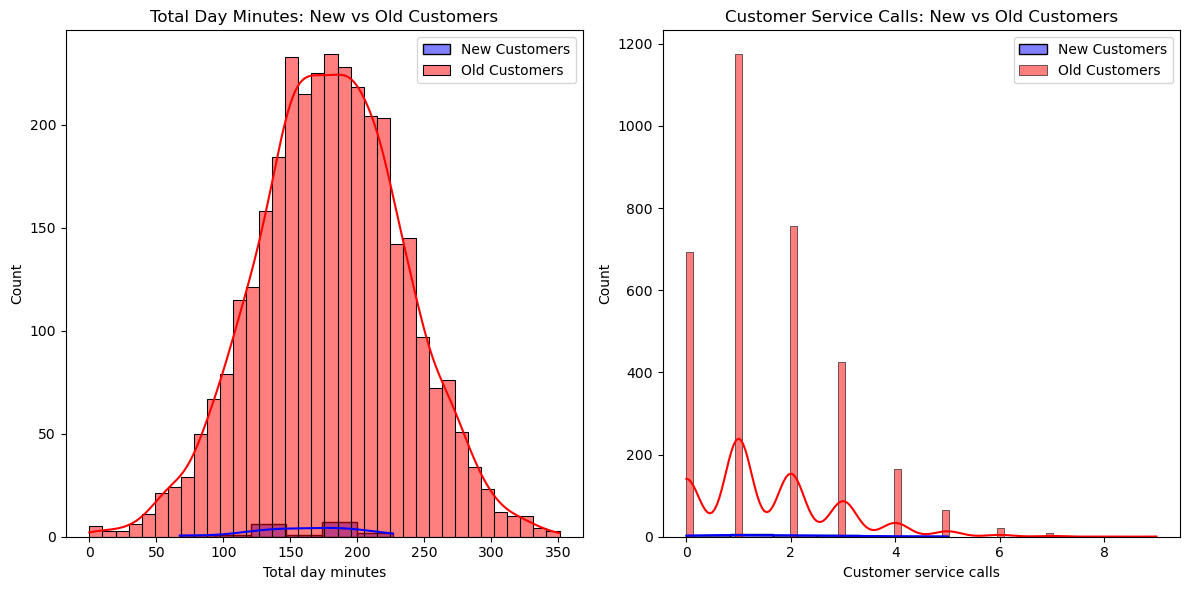

New Customers Statistics:
       Account length   Area code  International plan  Voice mail plan  \
count       18.000000   18.000000           18.000000        18.000000   
mean         2.555556  434.166667            0.166667         0.277778   
std          1.756408   41.820696            0.383482         0.460889   
min          1.000000  408.000000            0.000000         0.000000   
25%          1.000000  409.750000            0.000000         0.000000   
50%          2.500000  415.000000            0.000000         0.000000   
75%          3.000000  415.000000            0.000000         0.750000   
max          6.000000  510.000000            1.000000         1.000000   

       Number vmail messages  Total day minutes  Total day calls  \
count              18.000000          18.000000        18.000000   
mean                8.055556         162.050000        98.888889   
std                13.523279          38.664001        20.366896   
min                 0.000000       

In [93]:
# Add columns to classify new and old customers
df_new_churn['Customer_Type'] = df_new_churn['Account length'].apply(lambda x: 'New' if x <= 6 else 'Old')

# Analyze new and old customer data
new_customers = df_new_churn[df_new_churn['Customer_Type'] == 'New']
old_customers = df_new_churn[df_new_churn['Customer_Type'] == 'Old']

# Compare metrics between new and old customers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(new_customers['Total day minutes'], kde=True, color='blue', label='New Customers')
sns.histplot(old_customers['Total day minutes'], kde=True, color='red', label='Old Customers')
plt.legend()
plt.title('Total Day Minutes: New vs Old Customers')

plt.subplot(1, 2, 2)
sns.histplot(new_customers['Customer service calls'], kde=True, color='blue', label='New Customers')
sns.histplot(old_customers['Customer service calls'], kde=True, color='red', label='Old Customers')
plt.legend()
plt.title('Customer Service Calls: New vs Old Customers')

plt.tight_layout()
plt.show()

# Print out some descriptive statistics
print("New Customers Statistics:")
print(new_customers.describe())

print("\nOld Customers Statistics:")
print(old_customers.describe())